In [1]:
import numpy as np
import numpy.random as npr
from scipy import linalg as la
import matplotlib.pyplot as plt
import math as m
import pandas as pd

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


Covariance matrix: 
[[ 1.06101944  0.89340007  3.01543894]
 [ 0.89340007  9.53854268 11.32534281]
 [ 3.01543894 11.32534281 17.3562207 ]]

Eigenvalues: 
 [25.79+0.j -0.  +0.j  2.17+0.j]
Eigenvectors: 
 [[-0.12  -0.816  0.565]
 [-0.572 -0.408 -0.711]
 [-0.811  0.408  0.418]]

Eigenvalues with SVD: 
 [25.85  0.    2.17]
Eigenvectors with SVD: 
 [[-0.12  -0.816  0.565]
 [-0.572 -0.408 -0.712]
 [-0.812  0.408  0.418]]

Verify that the eigenvectors coincide (with an accurancy of 0.01): True
Verify that the eigenvalues coincide (with an accurancy of 0.1): True

For eigenvalue 1 the percent of the total dataset's variability is: 92.240870552052385 %
For eigenvalue 2 the percent of the total dataset's variability is: 0.000000000000004 %
For eigenvalue 3 the percent of the total dataset's variability is: 7.759129447947618 %

Only two pricipal components (the first and the third) contain more then 99% of the total variability, in fact when the dataset was constructed x3 was a combination of x1 a

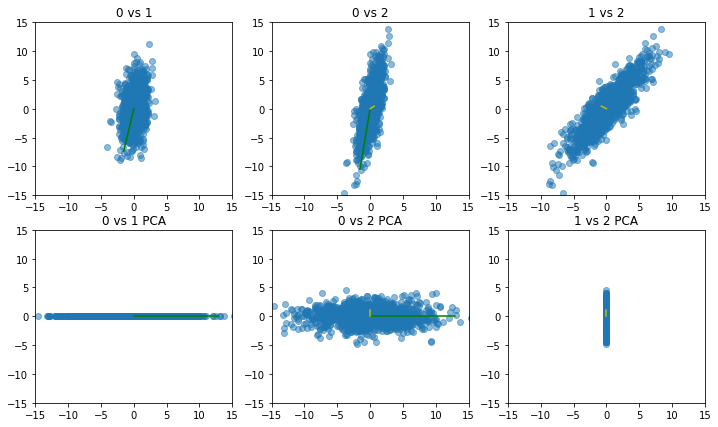

In [2]:
npr.seed(2053854)

#1
x1=npr.normal(loc=0, scale=1, size=1000)
x2=x1+npr.normal(loc=0, scale=3, size=1000)
x3=2*x1+x2

M=np.array([x1,x2,x3])

#2
covM=np.cov(M)
print("Covariance matrix: \n{}\n".format(covM))
l, V = la.eig(covM)
print("Eigenvalues: \n {}".format(l.round(2)))
print("Eigenvectors: \n {}\n".format(V.round(3))) 

#3
U, spectrum, Vt = la.svd(M)
U[:,[1,2]]=U[:,[2,1]]
spectrum[[1,2]]=spectrum[[2,1]]


print("Eigenvalues with SVD: \n {}".format((spectrum**2/(len(x1-1))).round(2)))
print("Eigenvectors with SVD: \n {}\n".format(U.round(3)))

print("Verify that the eigenvectors coincide (with an accurancy of 0.01): {}".format(np.allclose(U.round(2), V.round(2))))
print("Verify that the eigenvalues coincide (with an accurancy of 0.1): {}\n".format(np.allclose((spectrum**2/len(x1-1)).round(1), (np.real_if_close(l)).round(1))))

#4
for i in range(len(l)):
    print("For eigenvalue {} the percent of the total dataset's variability is: {:.15f} %".format(i+1, 100*abs(np.real_if_close(l)[i]/sum(np.real_if_close(l)))))

print( "\nOnly two pricipal components (the first and the third) contain more then 99% of the total variability, in fact when the dataset was constructed x3 was a combination of x1 and x2 \n")
    

    
#5
Mp=np.dot(V.T, M)


#6
scale_factor=0.5

l=np.real_if_close(l)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))

ax1.scatter(M[0,:], M[1,:], alpha=0.5)
ax1.plot([0,scale_factor*l[0]*V[0,0]], [0, scale_factor*l[0]*V[1,0]], c='g')
ax1.plot([0,scale_factor*l[1]*V[0,1]], [0, scale_factor*l[1]*V[1,1]], c='r') 
ax1.set_xlim(-15,15)
ax1.set_ylim(-15,15)
ax1.set_title("0 vs 1")

ax2.scatter(M[0,:], M[2,:], alpha=0.5)
ax2.plot([0,scale_factor*l[0]*V[0,0]], [0, scale_factor*l[0]*V[2,0]], c='g')
ax2.plot([0,scale_factor*l[2]*V[0,2]], [0, scale_factor*l[2]*V[2,2]], c='y')
ax2.set_xlim(-15,15)
ax2.set_ylim(-15,15)
ax2.set_title("0 vs 2")

ax3.scatter(M[1,:], M[2,:], alpha=0.5)
ax3.plot([0,scale_factor*l[1]*V[1,1]], [0, scale_factor*l[1]*V[2,1]], c='r')
ax3.plot([0,scale_factor*l[2]*V[1,2]], [0, scale_factor*l[2]*V[2,2]], c='y')
ax3.set_xlim(-15,15)
ax3.set_ylim(-15,15)
ax3.set_title("1 vs 2")

scale_factor=0.5

ax4.scatter(Mp[0,:], Mp[1,:], alpha=0.5)
ax4.plot([0,scale_factor*l[0]], [0, 0], c='g')
ax4.plot([0,0], [0, scale_factor*l[1]], c='r')
ax4.set_xlim(-15,15)
ax4.set_ylim(-15,15)
ax4.set_title("0 vs 1 PCA")

ax5.scatter(Mp[0,:], Mp[2,:], alpha=0.5)
ax5.plot([0,scale_factor*l[0]], [0, 0], c='g')
ax5.plot([0,0], [0, scale_factor*l[2]], c='y')
ax5.set_xlim(-15,15)
ax5.set_ylim(-15,15)
ax5.set_title("0 vs 2 PCA")

ax6.scatter(Mp[1,:], Mp[2,:], alpha=0.5)
ax6.plot([0,scale_factor*l[1]], [0, 0], c='r')
ax6.plot([0,0], [0, scale_factor*l[2]], c='y')
ax6.set_xlim(-15,15)
ax6.set_ylim(-15,15)
ax6.set_title("1 vs 2 PCA")

M1=M #for next exercise
Mp1=Mp
l1=l

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

(13, 1000)
For eigenvalue 1 the percent of the total dataset's variability is: 92.227751429767295 %
For eigenvalue 2 the percent of the total dataset's variability is: 7.758040235262584 %
For eigenvalue 3 the percent of the total dataset's variability is: 0.000000000000008 %
For eigenvalue 4 the percent of the total dataset's variability is: 0.001666922979915 %
For eigenvalue 5 the percent of the total dataset's variability is: 0.001629403102264 %
For eigenvalue 6 the percent of the total dataset's variability is: 0.001579692684940 %
For eigenvalue 7 the percent of the total dataset's variability is: 0.001223612563702 %
For eigenvalue 8 the percent of the total dataset's variability is: 0.001238053588361 %
For eigenvalue 9 the percent of the total dataset's variability is: 0.001280551218390 %
For eigenvalue 10 the percent of the total dataset's variability is: 0.001343051698009 %
For eigenvalue 11 the percent of the total dataset's variability is: 0.001378233783351 %
For eigenvalue 12 

/home/eugenio/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'PCA with the noise')

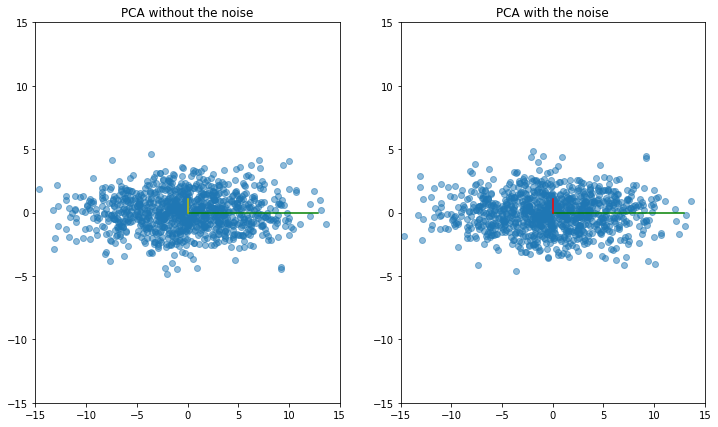

In [3]:
M=M1

for r in range(10):
    M=np.vstack([M,npr.normal(loc=0, scale=1/50, size=1000)])
    
print(M.shape)
covM=np.cov(M)
l, V = la.eig(covM)



for i in range(len(l)):
    print("For eigenvalue {} the percent of the total dataset's variability is: {:.15f} %".format(i+1, 100*abs(np.real_if_close(l)[i]/sum(np.real_if_close(l)))))


Mp=np.dot(V.T, M)


print("\nIt is possible to see that again the principal components are only 2 so by the PCA procedure we can reduce the problem to this 2 new cordinates and neglet the noise introduced")

scale_factor=0.5

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

ax1.scatter(Mp1[0,:], Mp1[2,:], alpha=0.5)
ax1.plot([0,scale_factor*l1[0]], [0, 0], c='g')
ax1.plot([0,0], [0, scale_factor*l1[2]], c='y')
ax1.set_xlim(-15,15)
ax1.set_ylim(-15,15)
ax1.set_title("PCA without the noise")

ax2.scatter(Mp[0,:], Mp[1,:], alpha=0.5)
ax2.plot([0,scale_factor*l[0]], [0, 0], c='g')
ax2.plot([0,0], [0, scale_factor*l[1]], c='r')
ax2.set_xlim(-15,15)
ax2.set_ylim(-15,15)
ax2.set_title("PCA with the noise")



3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


Eigenvalues: [ 3.57001736e+00  2.12567555e-03  5.30285794e-16 -4.46888945e-16
  3.31813739e-16 -2.99560293e-16  1.77751331e-16 -1.44592367e-16
 -1.44592367e-16 -2.57484334e-17 -2.57484334e-17  7.84888620e-17
  7.84888620e-17 -4.41268288e-17  4.13088982e-17  2.81012010e-17
 -1.15732204e-17 -5.74499076e-19 -1.44942565e-18  6.60864571e-18
  0.00000000e+00]
For eigenvalue 1 the percent of the total dataset's variability is: 99.940492988893141 %
For eigenvalue 2 the percent of the total dataset's variability is: 0.059507011106869 %
For eigenvalue 3 the percent of the total dataset's variability is: 0.000000000000015 %
For eigenvalue 4 the percent of the total dataset's variability is: 0.000000000000013 %
For eigenvalue 5 the percent of the total dataset's variability is: 0.000000000000009 %
For eigenvalue 6 the percent of the total dataset's variability is: 0.000000000000008 %
For eigenvalue 7 the percent of the total dataset's variability is: 0.000000000000005 %
For eigenvalue 8 the percen

/home/eugenio/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 0, 'time')

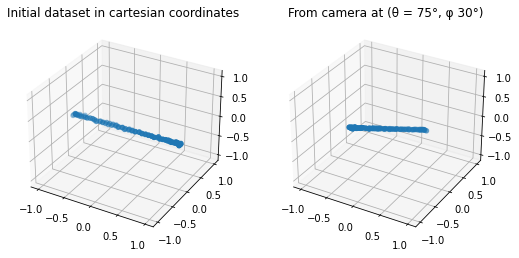

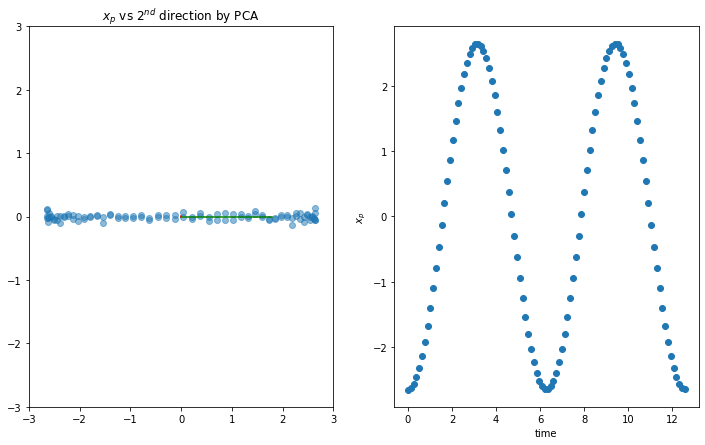

In [4]:
t=np.array(np.linspace(0,4*m.pi,100)) #time
x=np.cos(t)
y=np.zeros(100)+npr.normal(loc=0, scale=1/50, size=100)
z=np.zeros(100)

Mat=np.array([x, y, z])

fig=plt.figure(figsize=plt.figaspect(0.3))

#initial plot
aax1 = fig.add_subplot(1, 3, 1, projection='3d')
aax1.scatter(Mat[0], Mat[1], Mat[2])
aax1.set_title('Initial dataset in cartesian coordinates')


def MatRot(theta, phi):
    theta=theta*m.pi/180
    phi=phi*m.pi/180
    roty=np.array([[np.cos(phi),0,np.sin(phi)],[0, 1,0], [-np.sin(phi),0,np.cos(phi)]])
    rotz=np.array([[np.cos(theta),-np.sin(theta),0], [np.sin(theta),np.cos(theta),0],[0,0,1]])
    matrot=np.dot(rotz, roty)
    return matrot

theta=[10,20,30,45,50,70,75]
phi=[0,5,38,12,84,65,30]

totMat=[]


for thet, ph in zip(theta, phi):
    Matn=np.dot(MatRot(thet, ph),Mat)
    totMat.append(Matn[0])
    totMat.append(Matn[1])
    totMat.append(Matn[2])
    
#show that rotation works   
aax2 = fig.add_subplot(1, 3, 2, projection='3d')
aax2.scatter(Matn[0], Matn[1], Matn[2]) 
aax2.set_title('From camera at (\u03B8 = {}°, \u03C6 {}°)'.format(theta[-1], phi[-1]))


for a in (aax1,aax2):
    a.set_xlim(-1.1,1.1)
    a.set_ylim(-1.1,1.1)
    a.set_zlim(-1.1,1.1)
        
totMat=np.array(totMat)
totl, totV = la.eig(np.cov(totMat))

totl=np.real_if_close(totl)
print("Eigenvalues: {}".format(totl))
for i in range(len(totl)):
    print("For eigenvalue {} the percent of the total dataset's variability is: {:.15f} %".format(i+1, 100*abs(totl[i]/sum(totl))))

print("\nIt is possible to see again that just one eigenvalue contains more then 99% of the total variability. The second eigenvalue rapresent the variability in the cartesian y")

#PCA procedure
totMatp=np.dot(totV.T, totMat)
        
print("\nSo after the PCA procedure we have reduced the problem from {} to 1 principal component.".format(len(totMat)))



#plot the dataset in the principal component

scale_factor=0.5

fig1, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

ax1.scatter(totMatp[0,:], totMatp[1,:], alpha=0.5)
ax1.plot([0,scale_factor*totl[0]], [0, 0], c='g')
ax1.plot([0,0], [0, scale_factor*totl[1]], c='r')
ax1.set_xlim(-3,3)
ax1.set_ylim(-3,3)
ax1.set_title("$x_p$ vs $2^{nd}$ direction by PCA")

ax2.scatter(t, totMatp[0,:])
ax2.set_ylabel("$x_p$")  #we have again a cosine
ax2.set_xlabel("time")


    


    


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [5]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

In [7]:
file_name="~/data/magic04.data"
data=pd.read_csv(file_name, names=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","classification"])
data=data[data['classification']=='g']
data=data.iloc[:,:-2]
covm=np.cov(data)

lm, Vm = la.eig(covm)


print("Eigenvalues: {}".format(np.real_if_close(lm)))

for i in range(len(lm)):
    print("For eigenvalue {} the percent of the total dataset's variability is: {:.15f} %".format(i+1, 100*abs(np.real_if_close(lm)[i]/sum(np.real_if_close(lm)))))

    
dataPCA=np.dot(Vm.T, data)
    


Eigenvalues: [ 3.95235675e+06+0.00000000e+00j  2.06147810e+06+0.00000000e+00j
  1.20860232e+06+0.00000000e+00j ... -2.57462750e-14+2.94338077e-14j
 -2.57462750e-14-2.94338077e-14j -6.18413161e-15+0.00000000e+00j]
For eigenvalue 1 the percent of the total dataset's variability is: 48.458745751572032 %
For eigenvalue 2 the percent of the total dataset's variability is: 25.275209052236935 %
For eigenvalue 3 the percent of the total dataset's variability is: 14.818336525720891 %
For eigenvalue 4 the percent of the total dataset's variability is: 8.166332023685744 %
For eigenvalue 5 the percent of the total dataset's variability is: 2.536672359491494 %
For eigenvalue 6 the percent of the total dataset's variability is: 0.739825951782397 %
For eigenvalue 7 the percent of the total dataset's variability is: 0.004830121917880 %
For eigenvalue 8 the percent of the total dataset's variability is: 0.000048213592609 %
For eigenvalue 9 the percent of the total dataset's variability is: 0.0000000000

For eigenvalue 264 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 265 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 266 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 267 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 268 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 269 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 270 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 271 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 272 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 273 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 274 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenv

For eigenvalue 495 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 496 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 497 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 498 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 499 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 500 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 501 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 502 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 503 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 504 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 505 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenv

For eigenvalue 763 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 764 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 765 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 766 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 767 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 768 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 769 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 770 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 771 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 772 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 773 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenv

For eigenvalue 1025 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1026 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1027 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1028 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1029 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1030 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1031 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1032 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1033 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1034 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1035 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 1290 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1291 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1292 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1293 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1294 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1295 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1296 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1297 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1298 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1299 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1300 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 1554 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1555 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1556 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1557 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1558 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1559 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1560 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1561 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1562 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1563 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1564 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 1822 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1823 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1824 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1825 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1826 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1827 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1828 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1829 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1830 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1831 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 1832 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 2082 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2083 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2084 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2085 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2086 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2087 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2088 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2089 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2090 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2091 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2092 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 2341 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2342 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2343 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2344 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2345 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2346 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2347 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2348 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2349 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2350 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2351 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 2610 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2611 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2612 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2613 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2614 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2615 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2616 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2617 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2618 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2619 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2620 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 2883 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2884 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2885 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2886 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2887 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2888 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2889 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2890 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2891 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2892 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 2893 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 3147 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3148 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3149 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3150 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3151 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3152 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3153 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3154 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3155 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3156 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3157 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 3373 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3374 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3375 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3376 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3377 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3378 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3379 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3380 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3381 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3382 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3383 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 3616 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3617 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3618 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3619 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3620 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3621 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3622 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3623 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3624 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3625 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3626 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 3850 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3851 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3852 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3853 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3854 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3855 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3856 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3857 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3858 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3859 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 3860 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 4086 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4087 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4088 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4089 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4090 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4091 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4092 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4093 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4094 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4095 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4096 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 4319 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4320 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4321 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4322 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4323 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4324 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4325 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4326 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4327 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4328 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4329 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 4533 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4534 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4535 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4536 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4537 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4538 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4539 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4540 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4541 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4542 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4543 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 4777 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4778 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4779 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4780 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4781 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4782 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4783 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4784 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4785 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4786 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 4787 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 5021 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5022 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5023 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5024 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5025 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5026 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5027 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5028 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5029 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5030 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5031 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 5259 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5260 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5261 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5262 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5263 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5264 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5265 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5266 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5267 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5268 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5269 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 5515 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5516 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5517 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5518 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5519 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5520 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5521 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5522 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5523 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5524 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5525 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 5744 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5745 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5746 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5747 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5748 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5749 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5750 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5751 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5752 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5753 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5754 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 5985 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5986 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5987 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5988 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5989 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5990 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5991 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5992 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5993 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5994 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 5995 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 6241 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6242 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6243 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6244 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6245 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6246 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6247 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6248 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6249 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6250 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6251 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 6491 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6492 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6493 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6494 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6495 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6496 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6497 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6498 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6499 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6500 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6501 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 6740 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6741 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6742 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6743 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6744 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6745 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6746 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6747 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6748 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6749 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6750 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 6996 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6997 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6998 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 6999 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7000 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7001 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7002 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7003 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7004 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7005 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7006 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 7254 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7255 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7256 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7257 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7258 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7259 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7260 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7261 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7262 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7263 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7264 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 7510 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7511 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7512 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7513 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7514 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7515 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7516 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7517 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7518 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7519 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7520 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 7754 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7755 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7756 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7757 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7758 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7759 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7760 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7761 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7762 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7763 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 7764 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 8015 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8016 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8017 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8018 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8019 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8020 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8021 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8022 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8023 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8024 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8025 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 8269 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8270 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8271 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8272 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8273 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8274 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8275 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8276 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8277 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8278 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8279 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 8534 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8535 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8536 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8537 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8538 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8539 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8540 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8541 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8542 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8543 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8544 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 8766 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8767 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8768 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8769 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8770 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8771 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8772 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8773 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8774 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8775 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8776 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 8990 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8991 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8992 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8993 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8994 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8995 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8996 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8997 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8998 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 8999 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9000 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 9247 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9248 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9249 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9250 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9251 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9252 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9253 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9254 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9255 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9256 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9257 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 9490 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9491 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9492 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9493 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9494 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9495 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9496 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9497 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9498 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9499 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9500 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 9741 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9742 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9743 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9744 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9745 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9746 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9747 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9748 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9749 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9750 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9751 the percent of the total dataset's variability is: 0.000000000000000 %

For eigenvalue 9993 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9994 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9995 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9996 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9997 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9998 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 9999 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10000 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10001 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10002 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10003 the percent of the total dataset's variability is: 0.0000000000000

For eigenvalue 10251 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10252 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10253 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10254 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10255 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10256 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10257 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10258 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10259 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10260 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10261 the percent of the total dataset's variability is: 0.000000

For eigenvalue 10504 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10505 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10506 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10507 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10508 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10509 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10510 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10511 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10512 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10513 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10514 the percent of the total dataset's variability is: 0.000000

For eigenvalue 10760 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10761 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10762 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10763 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10764 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10765 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10766 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10767 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10768 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10769 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 10770 the percent of the total dataset's variability is: 0.000000

For eigenvalue 11011 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11012 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11013 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11014 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11015 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11016 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11017 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11018 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11019 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11020 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11021 the percent of the total dataset's variability is: 0.000000

For eigenvalue 11264 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11265 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11266 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11267 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11268 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11269 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11270 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11271 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11272 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11273 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11274 the percent of the total dataset's variability is: 0.000000

For eigenvalue 11518 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11519 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11520 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11521 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11522 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11523 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11524 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11525 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11526 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11527 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11528 the percent of the total dataset's variability is: 0.000000

For eigenvalue 11771 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11772 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11773 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11774 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11775 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11776 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11777 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11778 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11779 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11780 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 11781 the percent of the total dataset's variability is: 0.000000

For eigenvalue 12020 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12021 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12022 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12023 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12024 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12025 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12026 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12027 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12028 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12029 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12030 the percent of the total dataset's variability is: 0.000000

For eigenvalue 12280 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12281 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12282 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12283 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12284 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12285 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12286 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12287 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12288 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12289 the percent of the total dataset's variability is: 0.000000000000000 %
For eigenvalue 12290 the percent of the total dataset's variability is: 0.000000